In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [3]:
Pkg.add(["Lux"])

    Updating registry at `~/.julia/registries/General.toml`
    Updating registry at `~/.julia/registries/JSMLComponents.toml`
    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-574-2024/Project.toml`
  No Changes to `~/Documents/programming/BME-574-2024/Manifest.toml`
Precompiling project...
  ✓ StaticArrayInterface
  ✓ NNlib → NNlibForwardDiffExt
  ✓ StaticArrayInterface → StaticArrayInterfaceOffsetArraysExt
  ✓ StaticArrayInterface → StaticArrayInterfaceStaticArraysExt
  ✓ CloseOpenIntervals
  ✓ LayoutPointers
  ✓ TiledIteration
  ✓ StrideArraysCore
  ✓ Polyester
  ✓ FastBroadcast
  ✓ SparseDiffTools → SparseDiffToolsPolyesterExt
  ✓ RecursiveArrayTools → RecursiveArrayToolsFastBroadcastExt
  ✓ VectorizationBase
  ✓ LuxLib
  ✓ SLEEFPirates
  ✓ DiffEqBase
  ✓ LuxLib → LuxLibSLEEFPiratesExt
  ✓ DiffEqBase → DiffEqBas

In [4]:
using Plots, ModelingToolkit, OrdinaryDiffEq, Random, Lux, ADTypes, Optimisers, Zygote, Printf, MLUtils

In [5]:
using ModelingToolkit: t_nounits as t, D_nounits as D

In [6]:
@mtkmodel Lorenz begin
    @parameters begin
        σ = 10.0
        ρ = 26.0
        β = 8/3
    end
    @variables begin
        x(t) = 1.0
        y(t) = 0.0
        z(t) = 0.0
    end
    @equations begin
        D(x) ~ σ * (y - x)
        D(y) ~ x * (ρ - z) - y
        D(z) ~ x * y - β * z
    end
end

ModelingToolkit.Model{typeof(__Lorenz__), Dict{Symbol, Any}}(__Lorenz__, Dict{Symbol, Any}(:variables => Dict{Symbol, Dict{Symbol, Any}}(:y => Dict(:default => 0.0, :type => Real), :z => Dict(:default => 0.0, :type => Real), :x => Dict(:default => 1.0, :type => Real)), :kwargs => Dict{Symbol, Dict}(:ρ => Dict{Symbol, Any}(:value => 26.0, :type => Real), :σ => Dict{Symbol, Any}(:value => 10.0, :type => Real), :y => Dict{Symbol, Any}(:value => 0.0, :type => Real), :z => Dict{Symbol, Any}(:value => 0.0, :type => Real), :β => Dict{Symbol, Any}(:value => :(8 / 3), :type => Real), :x => Dict{Symbol, Any}(:value => 1.0, :type => Real)), :independent_variable => :t, :parameters => Dict{Symbol, Dict{Symbol, Any}}(:ρ => Dict(:default => 26.0, :type => Real), :σ => Dict(:default => 10.0, :type => Real), :β => Dict(:default => :(8 / 3), :type => Real)), :equations => Any["D(x) ~ σ * (y - x)", "D(x) ~ σ * (y - x)", "D(y) ~ x * (ρ - z) - y", "D(x) ~ σ * (y - x)", "D(y) ~ x * (ρ - z) - y", "D(z) ~ x 

In [7]:
@mtkbuild lorenz = Lorenz()
prob = ODEProblem(lorenz, [], (0,100.0),[])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

In [8]:
sol = solve(prob, Tsit5(); reltol=1e-10, abstol=1e-11)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 30953-element Vector{Float64}:
   0.0
   0.0009026540305243168
   0.0014894754347955224
   0.00235734406331401
   0.003187907717243731
   0.004153114505628712
   0.005153337107327233
   0.006234523636109482
   0.007364989932354748
   0.008554627019826056
   0.009792040981468603
   0.011077575646491002
   0.01240604364126476
   ⋮
  99.9660425986133
  99.9693947137519
  99.97275254895277
  99.9761171802697
  99.97948963487421
  99.98287090482602
  99.98626195780622
  99.98966375001183
  99.9930772350733
  99.99650337451352
  99.99994314532456
 100.0
u: 30953-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9911193334455038, 0.02335366499446452, 1.0486234146015071e-5]
 [0.9855010572988786, 0.03841437282659366, 2.8368748643700336e-5]
 [0.9774129327747108, 0.060517064214950574, 7.039216238276344e-5]
 [0.9699160199272091, 0.08148352564865147, 0.0001275932312476106]
 [0.9614983925277145, 0.10562717755815398, 0.

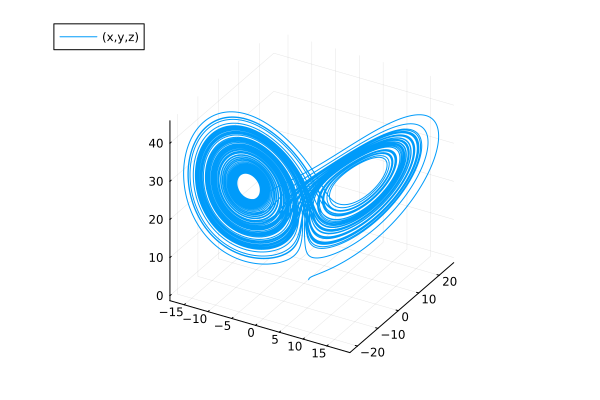

In [9]:
plot(sol, idxs=(1,2,3))

In [11]:
rng = MersenneTwister()
Random.seed!(rng, 12345)

MersenneTwister(12345)

In [12]:
sol_list = []
u0_list = []
for i in 1:100
    ric = 30*(rand(3).-0.5)
    new_prob = remake(prob, u0 = ric, tspan = (0,8))
    sol = solve(new_prob, Tsit5(); reltol=1e-10, abstol=1e-11, saveat=0.01)
    push!(sol_list, sol)
    push!(u0_list,ric)
end

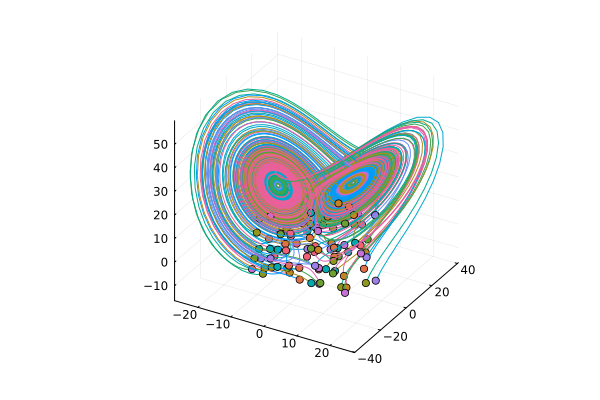

In [15]:
p = plot(sol_list[1],idxs = (1,2,3), legend=nothing)
scatter!(p, sol_list[1][1:1], idxs=(1,2,3))
for i in 2:100
    plot!(p, sol_list[i],idxs = (1,2,3), legend=nothing)
    scatter!(p, sol_list[i][1:1], idxs=(1,2,3))
end
p

In [18]:
sol_array = Array(sol_list[1])
input = sol_array[:,1:end-1]
output = sol_array[:,2:end]
for i in 2:100
    sol_array = Array(sol_list[i])
    input = hcat(sol_array[:,1:end-1],input)
    output = hcat(sol_array[:,2:end],output)
end

In [19]:
input

3×80000 Matrix{Float64}:
  3.47229   4.01413   4.54128   5.06061  …  -5.25793  -5.63684   -6.04255
  8.99      9.34666   9.76325  10.2346      -8.91579  -9.55867  -10.236
 14.0501   14.0193   14.0539   14.158       12.4173   12.5871    12.8262

In [20]:
output

3×80000 Matrix{Float64}:
  4.01413   4.54128   5.06061   5.57779  …  -5.63684   -6.04255   -6.47566
  9.34666   9.76325  10.2346   10.7551      -9.55867  -10.236    -10.9448
 14.0193   14.0539   14.158    14.3365      12.5871    12.8262    13.1429

In [22]:
i_data = Float32.(reshape(input, size(input,1),1,size(input,2)))
o_data = Float32.(reshape(output, size(output,1),1,size(output,2)))

3×1×80000 Array{Float32, 3}:
[:, :, 1] =
  4.0141287
  9.346659
 14.01925

[:, :, 2] =
  4.541283
  9.763252
 14.05389

[:, :, 3] =
  5.060609
 10.234624
 14.15797

;;; … 

[:, :, 79998] =
 -5.6368356
 -9.558673
 12.587105

[:, :, 79999] =
  -6.042549
 -10.2359915
  12.82624

[:, :, 80000] =
  -6.475661
 -10.944776
  13.142888

In [23]:
(i_train, o_train),(i_test, o_test) = splitobs((i_data, o_data); at=0.9)

((Float32[3.4722908; 8.990005; 14.050068;;; 4.0141287; 9.346659; 14.01925;;; 4.541283; 9.763252; 14.05389;;; … ;;; 1.7215894; 3.109262; 18.197224;;; 1.8589201; 3.2211912; 17.774302;;; 1.9946858; 3.3508217; 17.369066], Float32[4.0141287; 9.346659; 14.01925;;; 4.541283; 9.763252; 14.05389;;; 5.060609; 10.234624; 14.15797;;; … ;;; 1.8589201; 3.2211912; 17.774302;;; 1.9946858; 3.3508217; 17.369066;;; 2.130745; 3.4986825; 16.98172]), (Float32[1.4129622; 8.126704; -5.891861;;; 2.0730245; 8.596935; -5.5927634;;; 2.7244906; 9.261233; -5.2341027;;; … ;;; -5.257926; -8.915793; 12.417325;;; -5.6368356; -9.558673; 12.587105;;; -6.042549; -10.2359915; 12.82624], Float32[2.0730245; 8.596935; -5.5927634;;; 2.7244906; 9.261233; -5.2341027;;; 3.3862312; 10.111744; -4.8042765;;; … ;;; -5.6368356; -9.558673; 12.587105;;; -6.042549; -10.2359915; 12.82624;;; -6.475661; -10.944776; 13.142888]))

In [25]:
train_dataloader = DataLoader(collect.((i_train,o_train)); batchsize=100)
test_dataloader = DataLoader(collect.((i_test,o_test)); batchsize=100)

80-element DataLoader(::Tuple{Array{Float32, 3}, Array{Float32, 3}}, batchsize=100)
  with first element:
  (3×1×100 Array{Float32, 3}, 3×1×100 Array{Float32, 3},)

In [30]:
myact(x) = exp(-x^2)

myact (generic function with 1 method)

In [31]:
model = Chain(Dense(3 => 10, sigmoid), Dense(10 => 10, myact), Dense(10 => 10), Dense(10 => 3))

Chain(
    layer_1 = Dense(3 => 10, σ),        # 40 parameters
    layer_2 = Dense(10 => 10, myact),   # 110 parameters
    layer_3 = Dense(10 => 10),          # 110 parameters
    layer_4 = Dense(10 => 3),           # 33 parameters
)         # Total: 293 parameters,
          #        plus 0 states.

In [27]:
opt = Adam()

Adam(0.001, (0.9, 0.999), 1.0e-8)

In [28]:
const loss_function = MSELoss()

(::GenericLossFunction{typeof(Lux.LossFunctionImpl.l2_distance_loss), typeof(Statistics.mean)}) (generic function with 2 methods)

In [32]:
ps, st = Lux.setup(rng, model)

((layer_1 = (weight = Float32[0.38351727 -0.5882373 -0.34579706; 0.50603056 -0.7453399 -0.5695851; … ; 0.7323785 0.117249966 -0.92944574; 0.93178654 -0.21458101 0.11874795], bias = Float32[-0.17149805, 0.12405689, -0.13523388, -0.21517746, 0.3564947, -0.29835984, -0.5427606, -0.07084899, -0.19802518, -0.44165486]), layer_2 = (weight = Float32[-0.5354884 -0.05263723 … -0.12444897 0.099934615; 0.4889337 0.35458153 … 0.37563375 0.11513209; … ; 0.54444635 0.38529462 … 0.518998 -0.40204385; -0.0024534727 -0.19221643 … 0.40652233 0.12380766], bias = Float32[0.09842981, 0.28969228, 0.03285982, -0.29130685, 0.28091913, 0.026117736, -0.07711734, 0.31038377, 0.030667346, -0.15349264]), layer_3 = (weight = Float32[-0.29466915 0.50313693 … -0.2617361 0.17562898; -0.10600875 -0.08115761 … -0.38615307 -0.2355347; … ; -0.029304165 -0.06432923 … -0.53260285 0.49447063; -0.18105748 -0.12043446 … -0.3676528 -0.23731199], bias = Float32[0.048577856, -0.03290061, 0.18789603, -0.14814453, 0.2607645, -0.279

In [33]:
tstate = Training.TrainState(model, ps, st, opt)

TrainState
    model: Chain{@NamedTuple{layer_1::Dense{typeof(σ), Int64, Int64, Nothing, Nothing, Static.True}, layer_2::Dense{typeof(myact), Int64, Int64, Nothing, Nothing, Static.True}, layer_3::Dense{typeof(identity), Int64, Int64, Nothing, Nothing, Static.True}, layer_4::Dense{typeof(identity), Int64, Int64, Nothing, Nothing, Static.True}}, Nothing}((layer_1 = Dense(3 => 10, σ), layer_2 = Dense(10 => 10, myact), layer_3 = Dense(10 => 10), layer_4 = Dense(10 => 3)), nothing)
    # of parameters: 293
    # of states: 0
    optimizer: Adam(0.001, (0.9, 0.999), 1.0e-8)
    step: 0

In [38]:
Lux.apply(tstate.model, [1,2,2], tstate.parameters, tstate.states)[1]

3-element Vector{Float32}:
 -0.4992597
  0.098856226
 -0.5091728

In [42]:
function main(tstate::Training.TrainState, epochs)
    loss = 100.0
    local_loss = 100.0
    best_tstate = nothing
    for epoch in 1:epochs
        for (x,y) in train_dataloader
            _, l, _, tstate = Training.single_train_step!(AutoZygote(), loss_function, (x,y), tstate)
            if l<loss
                loss = l
                best_tstate = tstate
            end
            local_loss = l
        end
        if epoch % 50 == 1 || epoch == epochs
            @printf "Epoch: %3d \t Local Loss: %.5g Best Loss %.5g \n" epoch local_loss loss
        end
    end
    return best_tstate
end

tstate = main(tstate, 1000)
y_pred = Lux.apply(tstate.model, input, tstate.parameters, tstate.states)[1]

Epoch:   1 	 Local Loss: 14.754 Best Loss 0.76918 
Epoch:  51 	 Local Loss: 0.037123 Best Loss 0.0007556 
Epoch: 101 	 Local Loss: 0.020989 Best Loss 0.00062956 
Epoch: 151 	 Local Loss: 0.026699 Best Loss 0.00060554 
Epoch: 201 	 Local Loss: 0.018302 Best Loss 0.00014518 
Epoch: 251 	 Local Loss: 0.023338 Best Loss 0.00014518 
Epoch: 301 	 Local Loss: 0.02319 Best Loss 0.00014518 
Epoch: 351 	 Local Loss: 0.023068 Best Loss 0.00014518 
Epoch: 401 	 Local Loss: 0.027406 Best Loss 0.00014518 
Epoch: 451 	 Local Loss: 0.015273 Best Loss 0.00014344 
Epoch: 501 	 Local Loss: 0.014568 Best Loss 0.00014344 
Epoch: 551 	 Local Loss: 0.013115 Best Loss 0.00014344 
Epoch: 601 	 Local Loss: 0.019562 Best Loss 0.00010244 
Epoch: 651 	 Local Loss: 0.02565 Best Loss 0.00010244 
Epoch: 701 	 Local Loss: 0.036693 Best Loss 0.00010244 
Epoch: 751 	 Local Loss: 0.037307 Best Loss 4.4646e-05 
Epoch: 801 	 Local Loss: 0.017388 Best Loss 4.4646e-05 
Epoch: 851 	 Local Loss: 0.016253 Best Loss 4.4646e-05 


┌ Warning: Mixed-Precision `matmul_cpu_fallback!` detected and Octavian.jl cannot be used for this set of inputs (C [Matrix{Float64}]: A [Matrix{Float32}] x B [Matrix{Float64}]). Converting to common type to to attempt to use BLAS. This may be slow.
└ @ LuxLib.Impl ~/.julia/packages/LuxLib/wAt3f/src/impl/matmul.jl:148


3×80000 Matrix{Float64}:
  4.22528   4.71711   5.20508   5.69464  …  -5.70044   -6.11063   -6.5486
  9.53184   9.93515  10.3948   10.9055      -9.74254  -10.4392   -11.1691
 14.0019   14.0199   14.1134   14.2866      12.5545    12.7972    13.116

In [43]:
output

3×80000 Matrix{Float64}:
  4.01413   4.54128   5.06061   5.57779  …  -5.63684   -6.04255   -6.47566
  9.34666   9.76325  10.2346   10.7551      -9.55867  -10.236    -10.9448
 14.0193   14.0539   14.158    14.3365      12.5871    12.8262    13.1429

In [49]:
lorenz_predict = [30*(rand(3).-0.5)]
for i in 1:800
    push!(lorenz_predict, Lux.apply(tstate.model, lorenz_predict[end], tstate.parameters, tstate.states)[1])
end

In [50]:
lorenz_predict[1]

3-element Vector{Float64}:
 -7.453390325081798
  6.218731655030933
  3.0337579136357107

In [51]:
lp = reduce(hcat, lorenz_predict)

3×801 Matrix{Float64}:
 -7.45339  -5.89455  -4.75108  -3.92769  …  -9.90617  -9.83838  -9.76539
  6.21873   4.3877    2.88986   1.68771     -7.97087  -7.84667  -7.72849
  3.03376   2.3592    1.82105   1.45333     30.1455   30.106    30.0489

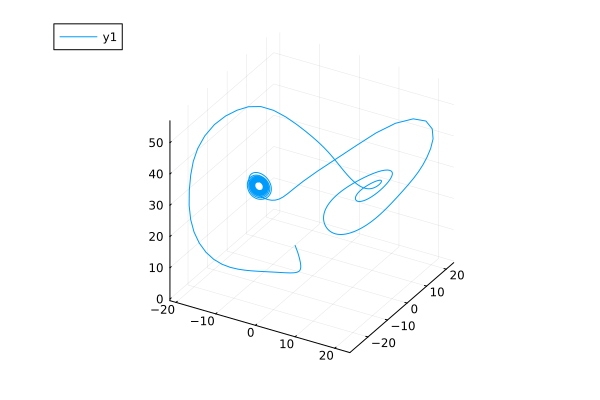

In [52]:
plot(lp[1,:], lp[2,:], lp[3,:])

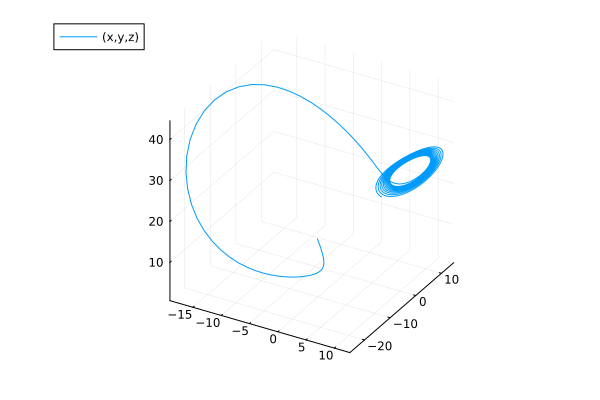

In [53]:
new_prob = remake(prob, u0 = lorenz_predict[1], tspan=(0,8))
new_sol = solve(new_prob, Tsit5(); reltol=1e-10, abstol=1e-11, saveat=0.01)
plot(new_sol, idxs=(1,2,3))